# <center><b>Spinal Pathology Prediction using Vertebral Column Data</b></center>

### Objective

In this notebook, we will explore the KNN algorithm and make efforts to predict spinal disease condition using the Vertebral column data.

### (a) Download Data  
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order):   
- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis.

The following convention is
used for the class labels:  
- DH (Disk Hernia)
- Spondylolisthesis (SL)
- Normal (NO)   
- Abnormal (AB).
    
In this notebook, we only focus on a binary classification task NO=0 and AB=1.  

Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

Package imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("====== Packages Imported ======")

====== Packages Imported ======


Get the Vertebral Column Data Set

In [2]:
# Ingesting the 2C Vertebral Column Data.
# Header = None -> because the provided dataset does not contain column names.
# sep = ' ' -> because the dataset has space ( ) as a separater instead of comma (,).
# names = [list of column names] -> these are the names of columns as per the description provided in the HW.
vc_data = pd.read_csv("../data/vertebral_column_data/column_2C.dat", 
                      header = None,
                      sep = ' ',
                      names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'labels'])

# Printing the dataset shape for future reference.
print("Total Rows and Columns in the dataset are:", vc_data.shape)

# Check how many different class values we have in the labels column.
print("Unique values in labels column:", vc_data['labels'].unique(), "\n")

# After checking that labels column has only 2 values of 'AB' and 'NO', now we can safely map this column.
# Mapping the labels AB=1 and NO=0, as per the instructions provided in the HW.
vc_data['labels'] = vc_data['labels'].map({'AB':1, 'NO':0})

vc_data.head()

Total Rows and Columns in the dataset are: (310, 7)
Unique values in labels column: ['AB' 'NO'] 



,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


### (b) Pre-Processing and Exploratory Data Analysis  

Pre-Processing and Exploratory data analysis:   
i. Making scatterplots of the independent variables in the dataset. Using color to show Classes 0 and 1.  
ii. Making boxplots for each of the independent variables. Using color to show Classes 0 and 1.  
iii. Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

#### i. Scatterplots

i. Making scatterplots of the independent variables in the dataset. Using color to show Classes 0 and 1.

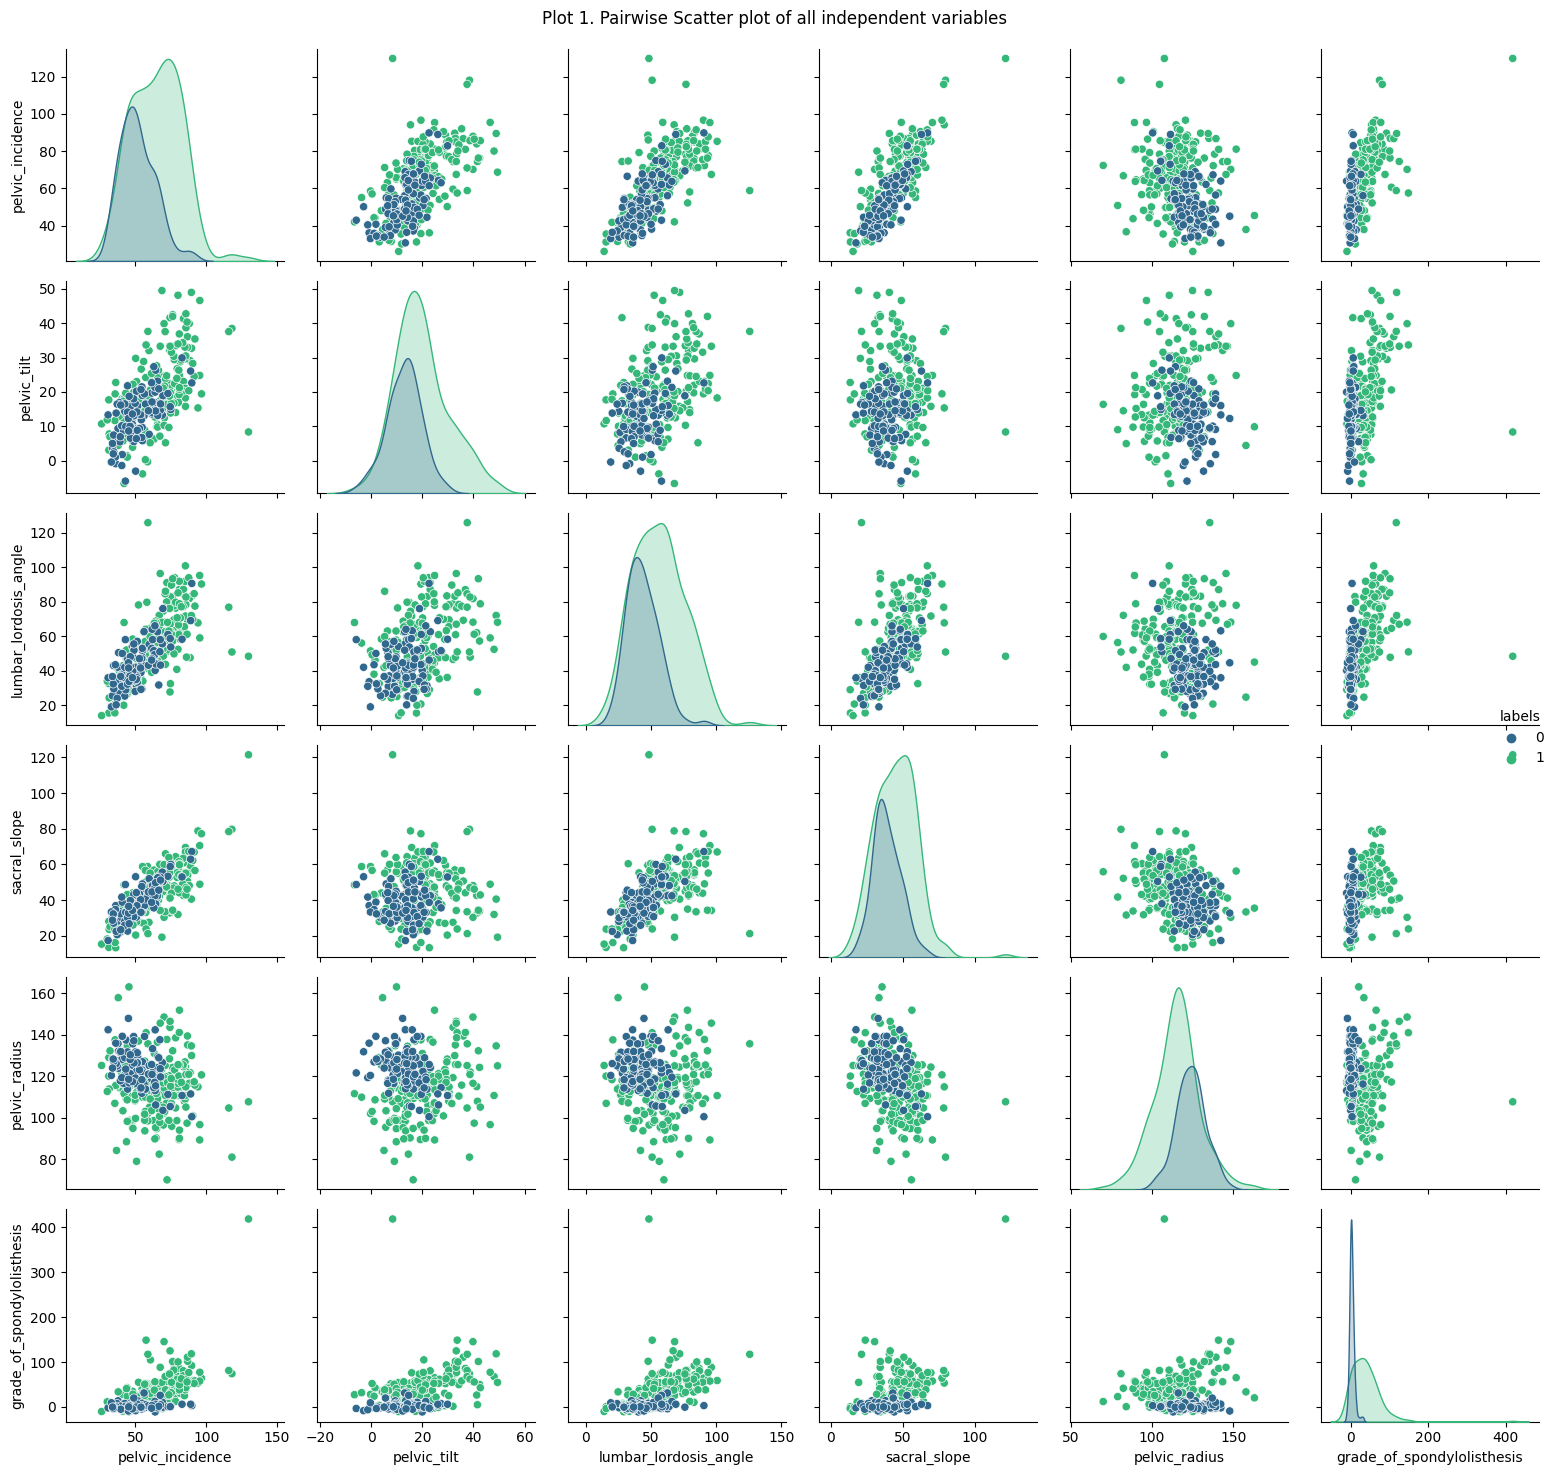

In [3]:
# Scatterplot for each of the 6 independent variables.
sns.pairplot(data=vc_data, hue="labels", palette="viridis")
plt.suptitle("Plot 1. Pairwise Scatter plot of all independent variables\n")
plt.tight_layout()
plt.show()

#### ii. Boxplots

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

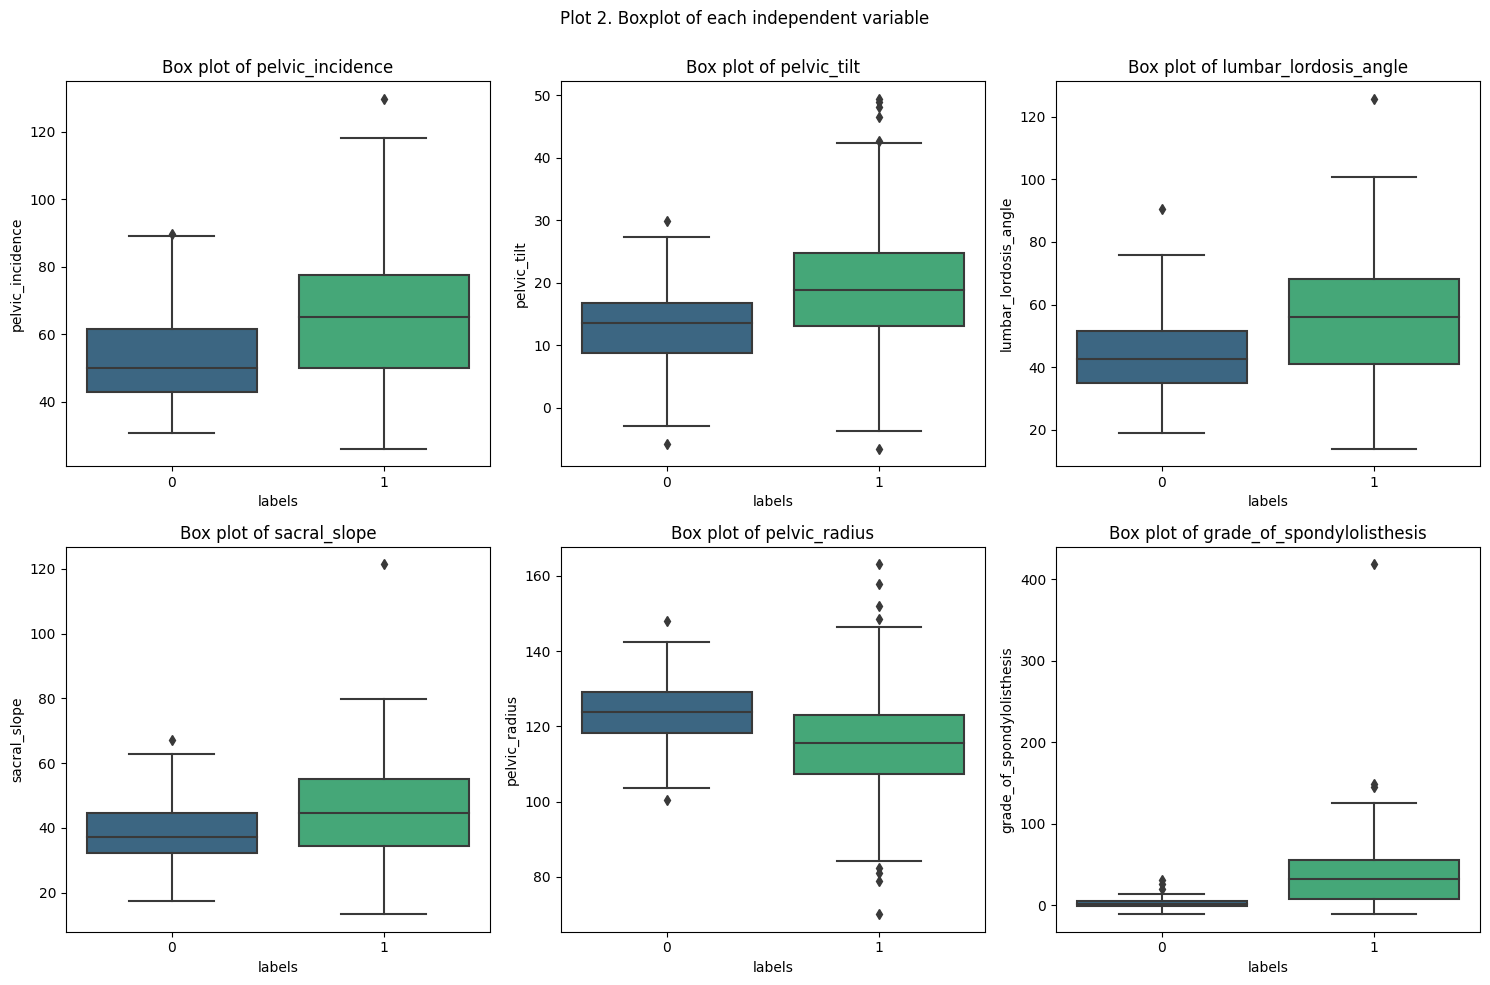

In [4]:
# Creating 6 subplots (2 rows x 3 columns) for boxplots of 6 independent variables against 1 labels variable.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=vc_data, x='labels', y='pelvic_incidence', palette="viridis").set(title='Box plot of pelvic_incidence')
sns.boxplot(ax=axes[0, 1], data=vc_data, x='labels', y='pelvic_tilt', palette="viridis").set(title='Box plot of pelvic_tilt')
sns.boxplot(ax=axes[0, 2], data=vc_data, x='labels', y='lumbar_lordosis_angle', palette="viridis").set(title='Box plot of lumbar_lordosis_angle')
sns.boxplot(ax=axes[1, 0], data=vc_data, x='labels', y='sacral_slope', palette="viridis").set(title='Box plot of sacral_slope')
sns.boxplot(ax=axes[1, 1], data=vc_data, x='labels', y='pelvic_radius', palette="viridis").set(title='Box plot of pelvic_radius')
sns.boxplot(ax=axes[1, 2], data=vc_data, x='labels', y='grade_of_spondylolisthesis', palette="viridis").set(title='Box plot of grade_of_spondylolisthesis')

plt.suptitle("Plot 2. Boxplot of each independent variable\n")
plt.tight_layout()
plt.show()

#### iii. Split Data Set

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
# Creating the training dataset from first 70 rows of Class 0 and the first 140 rows of Class 1.
train_data = vc_data[vc_data['labels']==0].head(70)
train_data = pd.concat([train_data, vc_data[vc_data['labels']==1].head(140)])

# Creating the test dataset from the remaining data points.
test_data = vc_data.drop(train_data.index)

# Verifying the training and testing datasets by looking at the count of labels and total count.
print("Value counts for label 1 and label 0 are as follows:\n", train_data['labels'].value_counts())
print("\nTraining data shape:", train_data.shape, "\nTesting data shape:", test_data.shape)

# Separating the features and labels from training dataset.
x_train = train_data.drop('labels', axis=1)
y_train = train_data['labels']

# Separating the features and labels from testing dataset.
x_test = test_data.drop('labels', axis=1)
y_test = test_data['labels']

print("\nX_train shape:", x_train.shape, "\nY_train shape:", y_train.shape, "\n\nX_test shape:", x_test.shape, "\nY_test shape:", y_test.shape)

Value counts for label 1 and label 0 are as follows:
 1    140
0     70
Name: labels, dtype: int64

Training data shape: (210, 7) 
Testing data shape: (100, 7)

X_train shape: (210, 6) 
Y_train shape: (210,) 

X_test shape: (100, 6) 
Y_test shape: (100,)


### (c) Classification  
Classification using KNN on Vertebral Column Data Set  

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package). 

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k_star  

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − (N/3) rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

#### i. Euclidean Metric

i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [6]:
# Creating a KNN Classifier with 'euclidean' metric using Scikit-learn package.
# Please note that the default value for metric is 'minkowski'.
knn_e = KNeighborsClassifier(metric='euclidean')
knn_e

KNeighborsClassifier(metric='euclidean')

#### ii. Test Data

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k_star

In [7]:
# To take testing decisions by majority polling, we can use the hyperparameter weights='uniform' while defining the KNN classifier.
# Please note that the default value for weights is 'uniform' itself.

# Defining empty lists to store error values.
train_error = []
test_error = []

# Defining sample values for k from 1 to 208 with increments of 3 as per the instructions given in HW.
k = [x for x in range(1, 209, 3)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_e = KNeighborsClassifier(n_neighbors=k_i, metric='euclidean', weights='uniform')
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_e.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train = knn_e.predict(x_train.values)
    y_pred_test = knn_e.predict(x_test.values)

    # Calculating training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error.append(1-accuracy_score(y_train, y_pred_train))
    test_error.append(1-accuracy_score(y_test, y_pred_test))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error = pd.DataFrame({"k":k, "train_error":train_error, "test_error":test_error})
df_k_error.head()

,k,train_error,test_error
0,1,0.000000,0.13
1,4,0.142857,0.06
2,7,0.142857,0.12
3,10,0.133333,0.10
4,13,0.142857,0.12


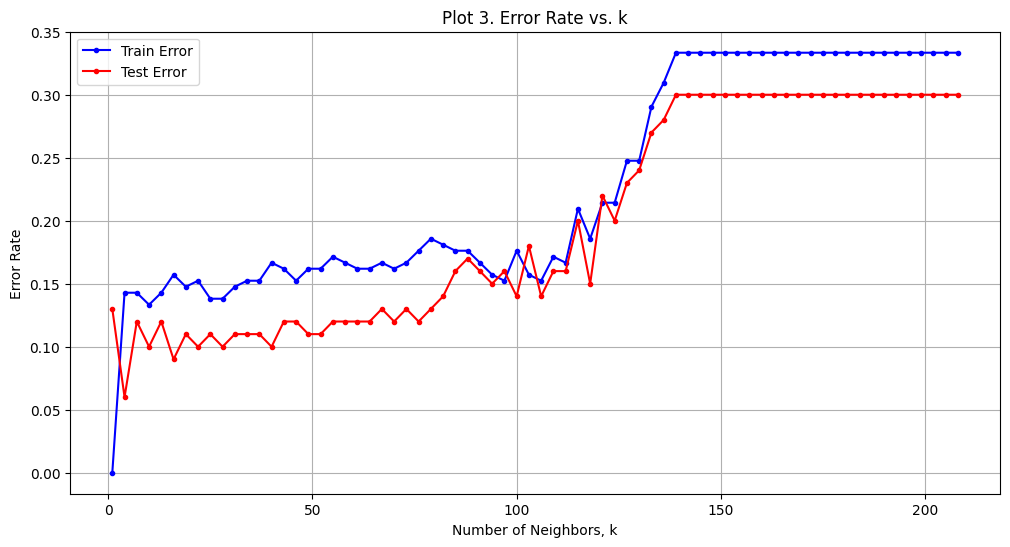

In [8]:
# Plotting train and test errors in terms of k.

# Generating plots.
plt.figure(figsize=(12,6))
plt.plot(df_k_error['k'], df_k_error['train_error'], label='Train Error', color='blue', marker=".")
plt.plot(df_k_error['k'], df_k_error['test_error'], label='Test Error', color='red', marker=".")

# Labels and title.
plt.xlabel('Number of Neighbors, k')
plt.ylabel('Error Rate')
plt.title('Plot 3. Error Rate vs. k')

# Finishing touches.
plt.legend()
plt.grid(True)
plt.show()

##### Best k value  
Now, the best k out of all these values is the one that has the lowest testing error, which can be identified by looking at the plot above.  
More precisely, it can be done by choosing the index of list 'k', at which the test_error is minimum. This is performed below.

In [9]:
k_star = k[test_error.index(min(test_error))]
print("========== k-STAR ==========\nThe best k value:", k_star, "\n")

========== k-STAR ==========
The best k value: 4 



Calculating the confusion matrix, true positive rate, true negative rate, precision, and F1-score for k_star, the best k value.

Metrics for the best k value, k=4

1) Confusion Matrix:


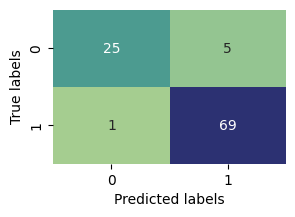

2) True Positive Rate(TPR): 0.9857

3) True Negative Rate(TNR): 0.8333

4) Precision: 0.9324

5) F1-Score: 0.9583



In [10]:
# Re-initializing the KNN classifier with k_star (the best k value obtained above).
knn_k_star = KNeighborsClassifier(n_neighbors=k_star, metric='euclidean', weights='uniform')

# Fitting the model with k_star.
knn_k_star.fit(x_train, y_train)

# Predicting the class labels for the testing data using k_star.
y_pred_k_star = knn_k_star.predict(x_test)

# Calculating confusion matrix, true positive rate, true negative rate, precision, and F1-score.
cf_mat = confusion_matrix(y_test, y_pred_k_star)
tn, fp, fn, tp = cf_mat.ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred_k_star)
f1 = f1_score(y_test, y_pred_k_star)

# Printing the metrics.
print("Metrics for the best k value, k={}".format(k_star))

print("\n1) Confusion Matrix:")
plt.figure(figsize=(3,2))
sns.heatmap(data=cf_mat, annot=True, cmap='crest', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

print("2) True Positive Rate(TPR): {:.4f}".format(tpr))
print("\n3) True Negative Rate(TNR): {:.4f}".format(tnr))
print("\n4) Precision: {:.4f}".format(precision))
print("\n5) F1-Score: {:.4f}\n".format(f1))

iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30, . . . , 210}. Note: for each N, select your training set by choosing the first bN/3c rows of Class 0 and the first N − (N/3) rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [11]:
# Initializing the variable training sets.
variable_training_sets = [x for x in range(10, 211, 10)]

# Empty lists to store the optimal k values and best test error rates.
optimal_k_values = []
best_test_error_rates = []

# Iterating over training set sizes.
for N in variable_training_sets:
    rows_class_0 = N//3
    rows_class_1 = N - rows_class_0

    # Building new sample training data based on the varying number of labels 0 and 1.
    sample_train_data = pd.concat([train_data[train_data["labels"] == 0].head(rows_class_0), train_data[train_data["labels"] == 1].head(rows_class_1)])

    # Separating predictors and labels.
    sample_x_train = sample_train_data.drop('labels', axis=1)
    sample_y_train = sample_train_data['labels']

    # Counters to store the best accuracy score and optimal k value for each iteration of k.
    best_accuracy_score = 0
    optimal_k = 0

    # Inner loop to iterate through varying values of k depending on N.
    for k_i in [n for n in range(1, N, 5)]:
        knn_s = KNeighborsClassifier(n_neighbors=k_i, metric='euclidean', weights='uniform')
        knn_s.fit(sample_x_train, sample_y_train)

        # Predicting for the original test set.
        y_pred_test = knn_s.predict(x_test.values)

        # Recording the best accuracy score and optimal k.
        as_i = accuracy_score(y_test, y_pred_test)
        if as_i > best_accuracy_score:
            best_accuracy_score = as_i
            optimal_k = k_i

    # Calculating the best test error rate and appending to the list. Also appending optimal k to the list.  
    optimal_k_values.append(optimal_k)
    best_test_error_rates.append(1 - best_accuracy_score)

#### iii. Learning Curve

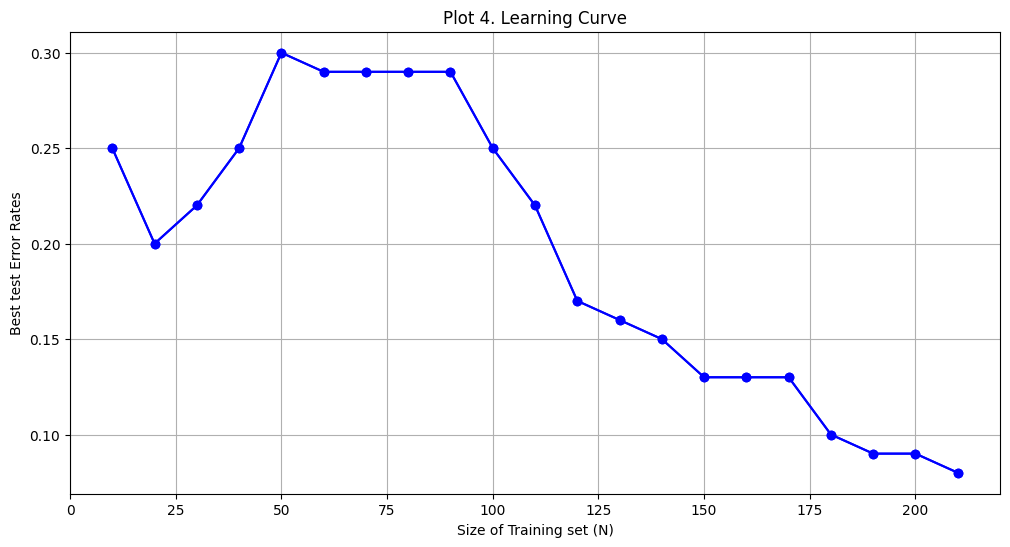

In [12]:
# Plotting best test error rates in terms of N.

# Generating plots.
plt.figure(figsize=(12,6))
plt.plot(variable_training_sets, best_test_error_rates, color='blue', marker="o")
plt.plot(variable_training_sets, best_test_error_rates, color='blue', marker="o")

# Labels and title.
plt.xlabel('Size of Training set (N)')
plt.ylabel('Best test Error Rates')
plt.title('Plot 4. Learning Curve')

# Finishing touches.
plt.grid(True)
plt.show()

### (d) Other Metrics

Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.  

i. Minkowski Distance:  
    A. which becomes Manhattan Distance with p = 1.  
    B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?  
    C. which becomes Chebyshev Distance with p → ∞  
    
ii. Mahalanobis Distance.

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [13]:
# Defining empty lists to store error values.
train_error_manhtn = []
test_error_manhtn = []

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_manhtn = KNeighborsClassifier(n_neighbors=k_i, metric='minkowski', p=1)
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_manhtn.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_manhtn = knn_manhtn.predict(x_train.values)
    y_pred_test_manhtn = knn_manhtn.predict(x_test.values)

    # Calculating training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_manhtn.append(1-accuracy_score(y_train, y_pred_train_manhtn))
    test_error_manhtn.append(1-accuracy_score(y_test, y_pred_test_manhtn))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_manhtn = pd.DataFrame({"k":k, "train_error_manhtn":train_error_manhtn, "test_error_manhtn":test_error_manhtn})
df_k_error_manhtn.head(10)

# The best k value is when the testing error is minimum.
k_star_manhtn = k[test_error_manhtn.index(min(test_error_manhtn))]
print("========== k-STAR (Manhattan) ==========\nThe best k value:", k_star_manhtn, "\n")

========== k-STAR (Manhattan) ==========
The best k value: 6 



##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [14]:
# Using numpy to define range for log10(p).
log10_p_variables = np.arange(0.1, 1.1, 0.1)

# Defining empty lists to store error values.
train_error_log10p = []
test_error_log10p = []

# Creating a loop to fit the model with each value of log10(p).
for var in log10_p_variables:
    # As per the logarithmic rules.
    p = 10**var
    knn_log10p = KNeighborsClassifier(n_neighbors=k_star_manhtn, metric='minkowski', p=p)
    knn_log10p.fit(x_train.values, y_train.values)

    # Predicting the training and test values
    y_pred_train_log10p = knn_log10p.predict(x_train.values)
    y_pred_test_log10p = knn_log10p.predict(x_test.values)

    # Calculating the training and testing errors using 1-Accuracy and storing each of them in the error list.
    train_error_log10p.append(1-accuracy_score(y_train, y_pred_train_log10p))
    test_error_log10p.append(1-accuracy_score(y_test, y_pred_test_log10p))

# Creating dataframe for the captured observations of training and testing errors.
df_error_log10p = pd.DataFrame({"log10p_var":var, "train_error_log10p":train_error_log10p, "test_error_log10p":test_error_log10p})
df_error_log10p.head(10)

# The best k value is when the testing error is minimum.
log10p_best = log10_p_variables[test_error_log10p.index(min(test_error_log10p))]
print("========== Best log10(p) value ==========\nThe best log10(p) value:", log10p_best, "\n")

========== Best log10(p) value ==========
The best log10(p) value: 0.6 



##### C. Chebyshev Distance With p -> infinity.

In [15]:
# Defining empty lists to store error values.
train_error_chbshv = []
test_error_chbshv = []

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_chbshv = KNeighborsClassifier(n_neighbors=k_i, metric='minkowski', p=float('inf'))
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_chbshv.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_chbshv = knn_chbshv.predict(x_train.values)
    y_pred_test_chbshv = knn_chbshv.predict(x_test.values)

    # Calculating training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_chbshv.append(1-accuracy_score(y_train, y_pred_train_chbshv))
    test_error_chbshv.append(1-accuracy_score(y_test, y_pred_test_chbshv))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_chbshv = pd.DataFrame({"k":k, "train_error_chbshv":train_error_chbshv, "test_error_chbshv":test_error_chbshv})
df_k_error_chbshv.head(10)

# The best k value is when the testing error is minimum.
k_star_chbshv = k[test_error_chbshv.index(min(test_error_chbshv))]
print("========== k-STAR (Chebyshev) ==========\nThe best k value:", k_star_chbshv, "\n")

========== k-STAR (Chebyshev) ==========
The best k value: 16 



#### ii. Mahalanobis Distance.

In [16]:
# Defining empty lists to store error values.
train_error_mhlnbs = []
test_error_mhlnbs = []

# Finding the inverse of covariance of training dataset to fullfill the metric parameter requirement for Mahalanobis distance metric.
cov_matrix = np.cov(x_train.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_mhlnbs = KNeighborsClassifier(n_neighbors=k_i, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_mhlnbs.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_mhlnbs = knn_mhlnbs.predict(x_train.values)
    y_pred_test_mhlnbs = knn_mhlnbs.predict(x_test.values)

    # Calculating the training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_mhlnbs.append(1-accuracy_score(y_train, y_pred_train_mhlnbs))
    test_error_mhlnbs.append(1-accuracy_score(y_test, y_pred_test_mhlnbs))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_mhlnbs = pd.DataFrame({"k":k, "train_error_mhlnbs":train_error_mhlnbs, "test_error_mhlnbs":test_error_mhlnbs})
df_k_error_mhlnbs.head(10)

# The best k value is when the testing error is minimum.
k_star_mhlnbs = k[test_error_mhlnbs.index(min(test_error_mhlnbs))]
print("========== k-STAR (Mahalanobis) ==========\nThe best k value:", k_star_mhlnbs, "\n")

========== k-STAR (Mahalanobis) ==========
The best k value: 1 



Summary Table

In [17]:
# Summarizing the recorded test errors in a tabular format using dataframe.
df_tab = pd.DataFrame({"Metric": ["Euclidean Distance", "Manhattan Distance (Minkowski, p = 1)", "Chebyshev Distance (Minkowski, p → ∞)", "Mahalanobis Distance"],
                       "Best_k_value": [k_star, k_star_manhtn, k_star_chbshv, k_star_mhlnbs],
                       "Best_Test_error": [min(test_error), min(test_error_manhtn), min(test_error_chbshv), min(test_error_mhlnbs)]}, index=None)

print("\nTable 1. Summary Table for recorded test errors and k-values\n")
df_tab


Table 1. Summary Table for recorded test errors and k-values



,Metric,Best_k_value,Best_Test_error
0,Euclidean Distance,4,0.06
1,"Manhattan Distance (Minkowski, p = 1)",6,0.11
2,"Chebyshev Distance (Minkowski, p → ∞)",16,0.08
3,Mahalanobis Distance,1,0.17


### (e) Weighted Decision

The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

  
Weighted Euclidean

In [18]:
# Defining empty lists to store error values.
train_error_we = []
test_error_we = []

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_we = KNeighborsClassifier(n_neighbors=k_i, metric='euclidean', weights='distance')
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_we.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_we = knn_we.predict(x_train.values)
    y_pred_test_we = knn_we.predict(x_test.values)

    # Calculating the training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_we.append(1-accuracy_score(y_train, y_pred_train_we))
    test_error_we.append(1-accuracy_score(y_test, y_pred_test_we))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_we = pd.DataFrame({"k":k, "train_error_we":train_error_we, "test_error_we":test_error_we})
df_k_error_we.head(10)

# The best k value is when the testing error is minimum.
k_star_we = k[test_error_we.index(min(test_error_we))]
print("========== Weighted Euclidean ==========\nThe best k value:", k_star_we, "\nThe best test error:", min(test_error_we), "\n")

========== Weighted Euclidean ==========
The best k value: 6 
The best test error: 0.09999999999999998 



Weighted Manhattan

In [19]:
# Defining empty lists to store error values.
train_error_wm = []
test_error_wm = []

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_wm = KNeighborsClassifier(n_neighbors=k_i, metric='manhattan', weights='distance')
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_wm.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_wm = knn_wm.predict(x_train.values)
    y_pred_test_wm = knn_wm.predict(x_test.values)

    # Calculating the training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_wm.append(1-accuracy_score(y_train, y_pred_train_wm))
    test_error_wm.append(1-accuracy_score(y_test, y_pred_test_wm))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_wm = pd.DataFrame({"k":k, "train_error_wm":train_error_wm, "test_error_wm":test_error_wm})
df_k_error_wm.head(10)

# The best k value is when the testing error is minimum.
k_star_wm = k[test_error_wm.index(min(test_error_wm))]
print("========== Weighted Manhattan ==========\nThe best k value:", k_star_wm, "\nThe best test error:", min(test_error_wm), "\n")

========== Weighted Manhattan ==========
The best k value: 26 
The best test error: 0.09999999999999998 



Weighted Chebyshev

In [20]:
# Defining empty lists to store error values.
train_error_wc = []
test_error_wc = []

# Defining sample values for k from 1 to 196 with increments of 5 as per the instructions given in HW.
k = [x for x in range(1, 197, 5)]

# Creating a loop to fit the model with each value of k.
for k_i in k:
    knn_wc = KNeighborsClassifier(n_neighbors=k_i, metric='chebyshev', weights='distance')
    ## Please note that I have used x_train.values and y_train.values here instead of x_train, y_train as I faced an error with the latter. 
    ## After researching the error, probably something to do with the scikit-learn version that I am using.
    knn_wc.fit(x_train.values, y_train.values)
    
    # Predicting values for training and testing data.
    y_pred_train_wc = knn_wc.predict(x_train.values)
    y_pred_test_wc = knn_wc.predict(x_test.values)

    # Calculating the training and testing errors using 1-Accuracy and storing each of them in the lists.
    train_error_wc.append(1-accuracy_score(y_train, y_pred_train_wc))
    test_error_wc.append(1-accuracy_score(y_test, y_pred_test_wc))

# Creating dataframe for the captured observations of training and testing errors.
df_k_error_wc = pd.DataFrame({"k":k, "train_error_wc":train_error_wc, "test_error_wc":test_error_wc})

# The best k value is when the testing error is minimum.
k_star_wc = k[test_error_wc.index(min(test_error_wc))]
print("========== Weighted Chebyshev ==========\nThe best k value:", k_star_wc, "\nThe best test error:", min(test_error_wc), "\n")

========== Weighted Chebyshev ==========
The best k value: 16 
The best test error: 0.10999999999999999 



### (f) Training Error Rate

What is the lowest training error rate you achieved in this homework?

In [21]:
# Creating a dataframe to store all the best k values, training errors, and testing errors recorded in this homework.
df_all_training_errors = pd.DataFrame({"Metric": ["Euclidean", "Manhattan", "Chebyshev", "Mahalanobis", "Euclidean", "Manhattan", "Chebyshev"],
                                       "Distance":["Uniform", "Uniform", "Uniform", "Uniform", "Weighted", "Weighted", "Weighted"],
                                       "best_k_values":[k_star, k_star_manhtn, k_star_chbshv, k_star_mhlnbs, k_star_we, k_star_wm, k_star_wc],
                                       "Lowest_Training_Error":[min(train_error), min(train_error_manhtn), min(train_error_chbshv), min(train_error_mhlnbs), min(train_error_we), min(train_error_wm), min(train_error_wc)],
                                       "Lowest_Testing_Error":[min(test_error), min(test_error_manhtn), min(test_error_chbshv), min(test_error_mhlnbs), min(test_error_we), min(test_error_wm), min(test_error_wc)]})

print("\nTable 2. Summary Table for all recorded values in this HW\n")
df_all_training_errors


Table 2. Summary Table for all recorded values in this HW



,Metric,Distance,best_k_values,Lowest_Training_Error,Lowest_Testing_Error
0,Euclidean,Uniform,4,0.0,0.06
1,Manhattan,Uniform,6,0.0,0.11
2,Chebyshev,Uniform,16,0.0,0.08
3,Mahalanobis,Uniform,1,0.0,0.17
4,Euclidean,Weighted,6,0.0,0.10
5,Manhattan,Weighted,26,0.0,0.10
6,Chebyshev,Weighted,16,0.0,0.11


In [22]:
# Calculating the overall lowest training error from the above dataframe.
print("========== Lowest Training Error =========\nThe overall lowest training error observed in this homework is:",
      min(df_all_training_errors["Lowest_Training_Error"]), "\n\n")

========== Lowest Training Error =========
The overall lowest training error observed in this homework is: 0.0 




References and Citations:  
1) https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
3) https://www.analyticsvidhya.com/blog/2021/08/how-knn-uses-distance-measures/
4) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
5) https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
6) https://seaborn.pydata.org/tutorial/introduction.html
